# Kaggle - Porte Seguro Safe Driver Prediction - EDA
**Author: Chris Shin**

## Business Understanding
In this competition, we are challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = './data/'
train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

-----------------------------------------
------------------------------------------
# Explore Data

In [3]:
print(train.shape, test.shape)

(595212, 58) (892816, 57)


Train has about 595,000 and Test data has 892,000 data. Interestingly there are more test data than train data. There are total 57 features.

In [4]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [6]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


As submission show, we are trying to get the probability of target being 1.
When target is 0, it meant driver won't claim for the insurance money. When target is 1, it meant driver will cliam the insurance. We are predicing the probability of driver will claim the insurance.

In [7]:
# Check the Target Variables and its density. We see 3.6% of 1. This is inbalance data
print(np.unique(train['target']))
print(1.0 * sum(train['target'])/train.shape[0])

[0 1]
0.036447517859182946


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

We see all the data is numeric that is either int64 or float64. Let's go back to the data description provided by the Kaggle.

Data Description:

`In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.`

From the data description we found below:
- There is tagging after ps_ such as ind, car, calc. 
- postfix bin = binary
- postfix cat = categorical
- no postfix = ordinal or continuous (numerical)
- value of -1 is missing value

Tagging does not provide much information but we have information on postfix that is providing feature type information.

In [9]:
pd.options.display.max_columns = None
train.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.368

In [10]:
train.loc[:, train.dtypes == np.int64].describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.

In [11]:
train.loc[:, train.dtypes == np.float64].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [12]:
for col in train.columns:
    if train.dtypes[col] == 'int64':
        print(f"{col} - {train[col].nunique()} integers")
    else:
        print(f"{col} - {train[col].nunique()} floats")

target - 2 integers
ps_ind_01 - 8 integers
ps_ind_02_cat - 5 integers
ps_ind_03 - 12 integers
ps_ind_04_cat - 3 integers
ps_ind_05_cat - 8 integers
ps_ind_06_bin - 2 integers
ps_ind_07_bin - 2 integers
ps_ind_08_bin - 2 integers
ps_ind_09_bin - 2 integers
ps_ind_10_bin - 2 integers
ps_ind_11_bin - 2 integers
ps_ind_12_bin - 2 integers
ps_ind_13_bin - 2 integers
ps_ind_14 - 5 integers
ps_ind_15 - 14 integers
ps_ind_16_bin - 2 integers
ps_ind_17_bin - 2 integers
ps_ind_18_bin - 2 integers
ps_reg_01 - 10 floats
ps_reg_02 - 19 floats
ps_reg_03 - 5013 floats
ps_car_01_cat - 13 integers
ps_car_02_cat - 3 integers
ps_car_03_cat - 3 integers
ps_car_04_cat - 10 integers
ps_car_05_cat - 3 integers
ps_car_06_cat - 18 integers
ps_car_07_cat - 3 integers
ps_car_08_cat - 2 integers
ps_car_09_cat - 6 integers
ps_car_10_cat - 3 integers
ps_car_11_cat - 104 integers
ps_car_11 - 5 integers
ps_car_12 - 184 floats
ps_car_13 - 70482 floats
ps_car_14 - 850 floats
ps_car_15 - 15 floats
ps_calc_01 - 10 floats

By analyzing the integer and float types of data, we can identify that float is continuous variables as their number of unique values are large and their statistical describe shows traits of continuous variables.
Integer values, however, shows characteristics of ordinal values that its number of unique values are low.

-----------------------------------------
### Missing Values

In [13]:
sum(train.isnull().sum(axis=0))

0

In [14]:
sum(test.isnull().sum(axis=0))

0

Every data is filled but it may contain -1 which is the missing value for this project

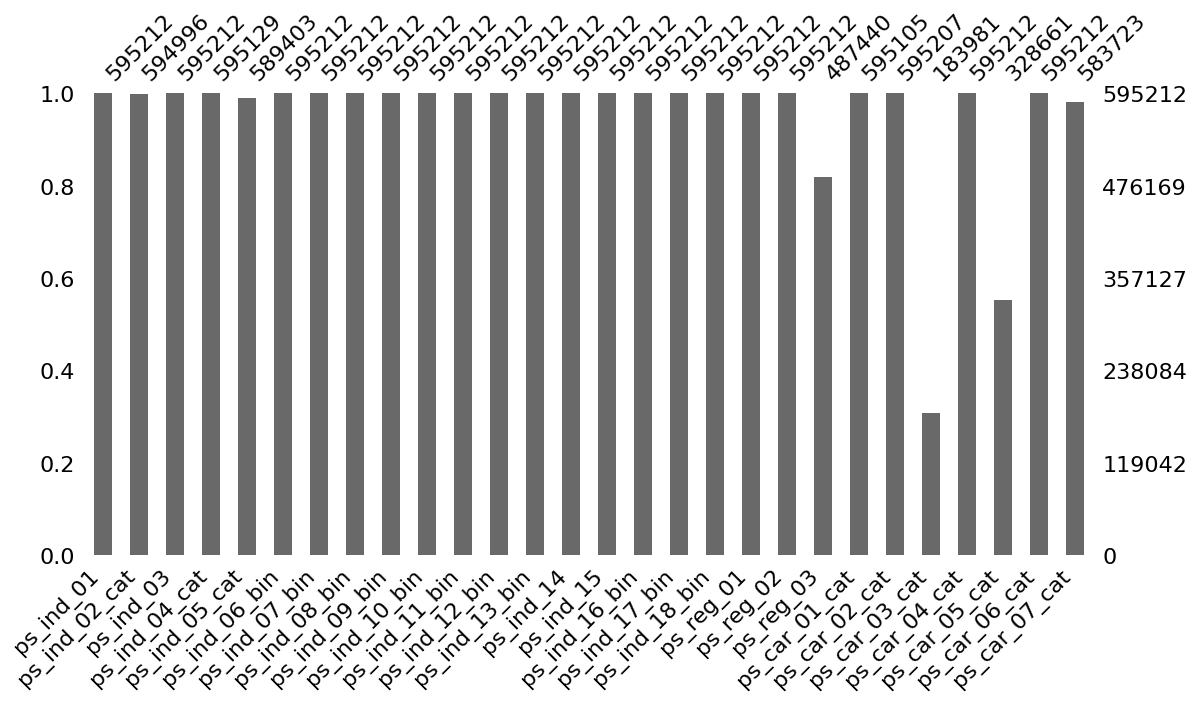

In [15]:
import missingno as msno

# To analyze missing values, create copy of train and convert -1 to NaN
train_copy = train.copy().replace(-1, np.NaN)

msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13, 6));

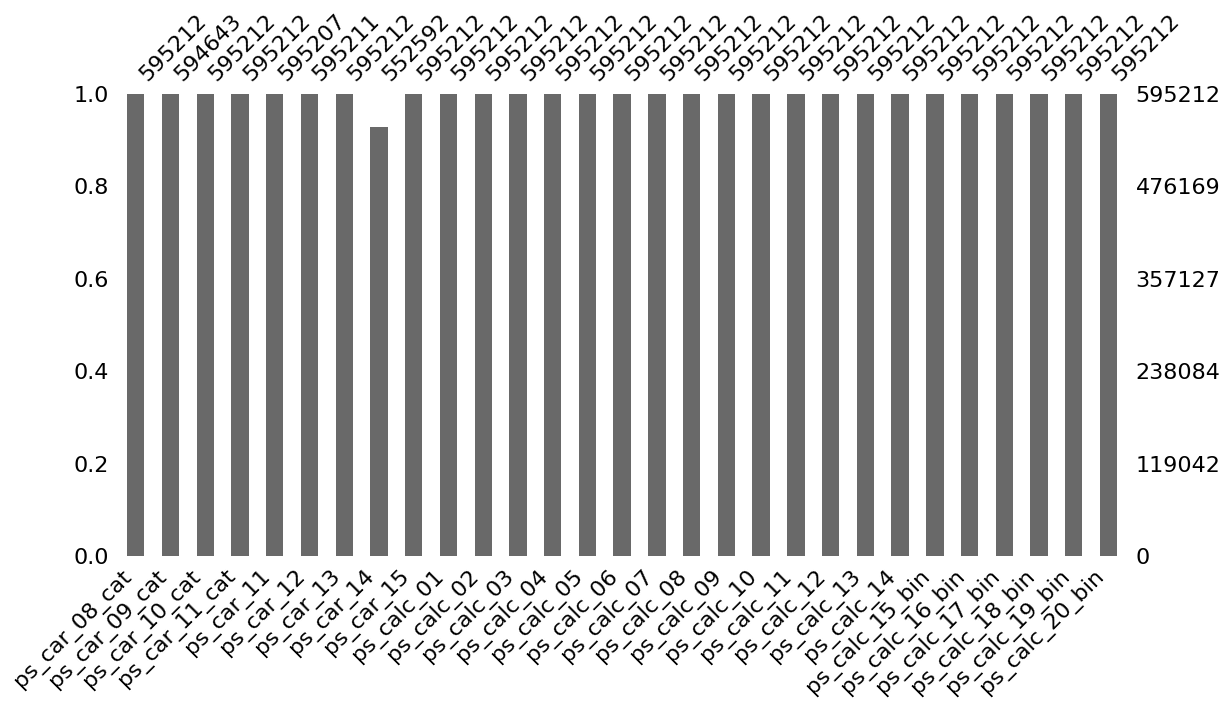

In [16]:
msno.bar(df=train_copy.iloc[:, 29:], figsize=(13, 6));

Data is all filled, but we identified there are some features that have large number of missing data. 

**Notes 1 : From the missingno bar plots, we identified `ps_reg_03`, `ps_car_03_cat`, `ps_car_05_cat`, and `ps_car_14` have quite large number of missing values.**

-----------------------------------------
### Feature Summary Table

Let's createy summary of features for better analysis.

In [17]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary['Missinv Values'] = (df == -1).sum().values
    summary['Unique Numbers'] = df.nunique().values
    summary['Feature Type'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, 'Feature Type'] = 'binary'
        elif 'cat' in col:
            summary.loc[col, 'Feature Type'] = 'categorical'
        elif df[col].dtype == np.float64:
            summary.loc[col, 'Feature Type'] = 'continuous'
        elif df[col].dtype == np.int64:
            summary.loc[col, 'Feature Type'] = 'ordinal'

    return summary

In [18]:
feature_summary = resumetable(train)
feature_summary

데이터 세트 형상: (595212, 58)


,Data Type,Missinv Values,Unique Numbers,Feature Type
target,int64,0,2,binary
ps_ind_01,int64,0,8,ordinal
ps_ind_02_cat,int64,216,5,categorical
ps_ind_03,int64,0,12,ordinal
ps_ind_04_cat,int64,83,3,categorical
ps_ind_05_cat,int64,5809,8,categorical
ps_ind_06_bin,int64,0,2,binary
ps_ind_07_bin,int64,0,2,binary
ps_ind_08_bin,int64,0,2,binary
ps_ind_09_bin,int64,0,2,binary


In [19]:
feature_summary[feature_summary['Feature Type'] == 'categorical']

,Data Type,Missinv Values,Unique Numbers,Feature Type
ps_ind_02_cat,int64,216,5,categorical
ps_ind_04_cat,int64,83,3,categorical
ps_ind_05_cat,int64,5809,8,categorical
ps_car_01_cat,int64,107,13,categorical
ps_car_02_cat,int64,5,3,categorical
ps_car_03_cat,int64,411231,3,categorical
ps_car_04_cat,int64,0,10,categorical
ps_car_05_cat,int64,266551,3,categorical
ps_car_06_cat,int64,0,18,categorical
ps_car_07_cat,int64,11489,3,categorical


In [20]:
feature_summary[feature_summary['Feature Type'] == 'ordinal']

,Data Type,Missinv Values,Unique Numbers,Feature Type
ps_ind_01,int64,0,8,ordinal
ps_ind_03,int64,0,12,ordinal
ps_ind_14,int64,0,5,ordinal
ps_ind_15,int64,0,14,ordinal
ps_car_11,int64,5,5,ordinal
ps_calc_04,int64,0,6,ordinal
ps_calc_05,int64,0,7,ordinal
ps_calc_06,int64,0,11,ordinal
ps_calc_07,int64,0,10,ordinal
ps_calc_08,int64,0,11,ordinal


In [21]:
feature_summary[feature_summary['Feature Type'] == 'continuous']

,Data Type,Missinv Values,Unique Numbers,Feature Type
ps_reg_01,float64,0,10,continuous
ps_reg_02,float64,0,19,continuous
ps_reg_03,float64,107772,5013,continuous
ps_car_12,float64,1,184,continuous
ps_car_13,float64,0,70482,continuous
ps_car_14,float64,42620,850,continuous
ps_car_15,float64,0,15,continuous
ps_calc_01,float64,0,10,continuous
ps_calc_02,float64,0,10,continuous
ps_calc_03,float64,0,10,continuous


In [22]:
feature_summary[feature_summary['Feature Type'] == 'binary']

,Data Type,Missinv Values,Unique Numbers,Feature Type
target,int64,0,2,binary
ps_ind_06_bin,int64,0,2,binary
ps_ind_07_bin,int64,0,2,binary
ps_ind_08_bin,int64,0,2,binary
ps_ind_09_bin,int64,0,2,binary
ps_ind_10_bin,int64,0,2,binary
ps_ind_11_bin,int64,0,2,binary
ps_ind_12_bin,int64,0,2,binary
ps_ind_13_bin,int64,0,2,binary
ps_ind_16_bin,int64,0,2,binary


-----------------------------------------
------------------------------------------
# Analyze Data with Visualization

Through the data visualization, we can get more insights of features. We can find which features are more important or if there is any trends or characteristics we can find to use.

First we will look at the target variables.

In [23]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Function to display percentage of the distributions
def write_percent(ax, total_size):
    # for each patch
    # patch: arbitrary two dimensional regions
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        # get x coordinate to define location to put text
        x_coord = patch.get_x()
        # for count plot, height is number of counts
        percent = height / total_size * 100 

        ax.text(x_coord + width / 2., # x loc : given patch x coordinate + width /2 to put in center
                height + total_size * 0.001, # y loc
                '{:1.1f}%'.format(percent),
                ha='center') # horizontal alignment

Text(0.5, 1.0, 'Target Distribution')

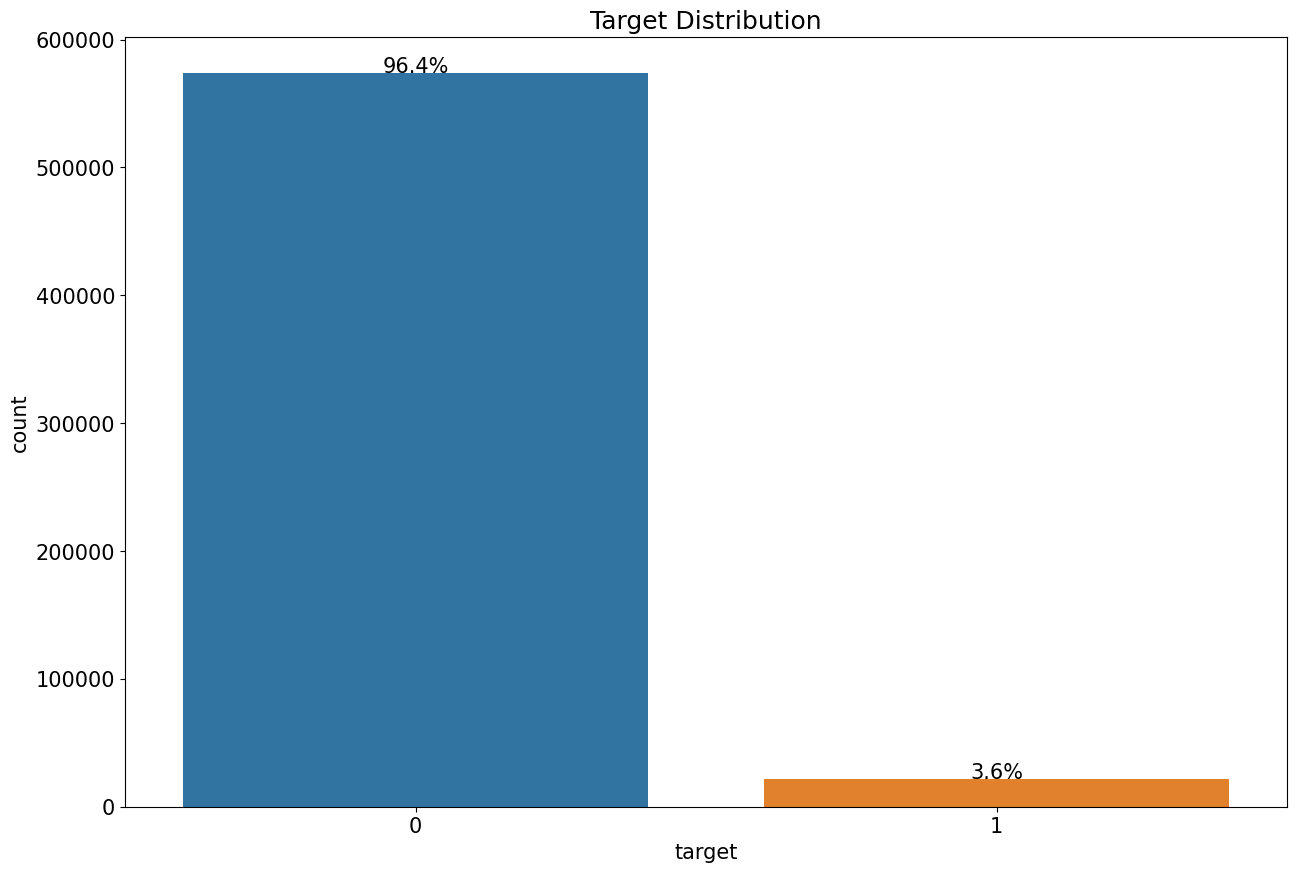

In [25]:
mpl.rc('font', size=15) # configure font size
plt.figure(figsize=(15,10))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

We see very inbalance data for target that only 3.6% of drivers claimed the insurance money. 

**Notes 2 : Target data is inbalance**

-------------------------
### Feature Analysis

Target data is found to be inbalance. Therefore, for this case of problem, rather than looking at the distribution of each feature, it would be better to find out the ratio of the target value 1 for each uniques values of each feature.

Let's say feature A has unique values ​​a and b. At this time, we want to see how much the target value 1 ratio is for each unique values a and b. If the target value 1 ratio for each values is the same, or the statistical significance is poor, it is difficult to identify or get information about target with feature A. Thus it is not helpful for prediction. If The target value ratio depending on the unique values are different for given feature, then that feature provide more helpful insight to predict the target value.

It is also requires to have reasonable size of confidencial interval to determine statistical signifiance of that feature. If the ratio of target 1 for unique values are different but confidencial interval of that unique value is high, then its significance is poor so that feature cannot be use. 

It is good feature to use for the prediction when there is significant difference for each unique values in terms of ratio of target 1 values and when there is small confidence interval.

------------------------
We will draw bar plot to see which features may be the useful features to use in prediction.

First we will draw plots for binary features

In [26]:
feature_summary[feature_summary['Feature Type'] == 'binary'].shape

(18, 4)

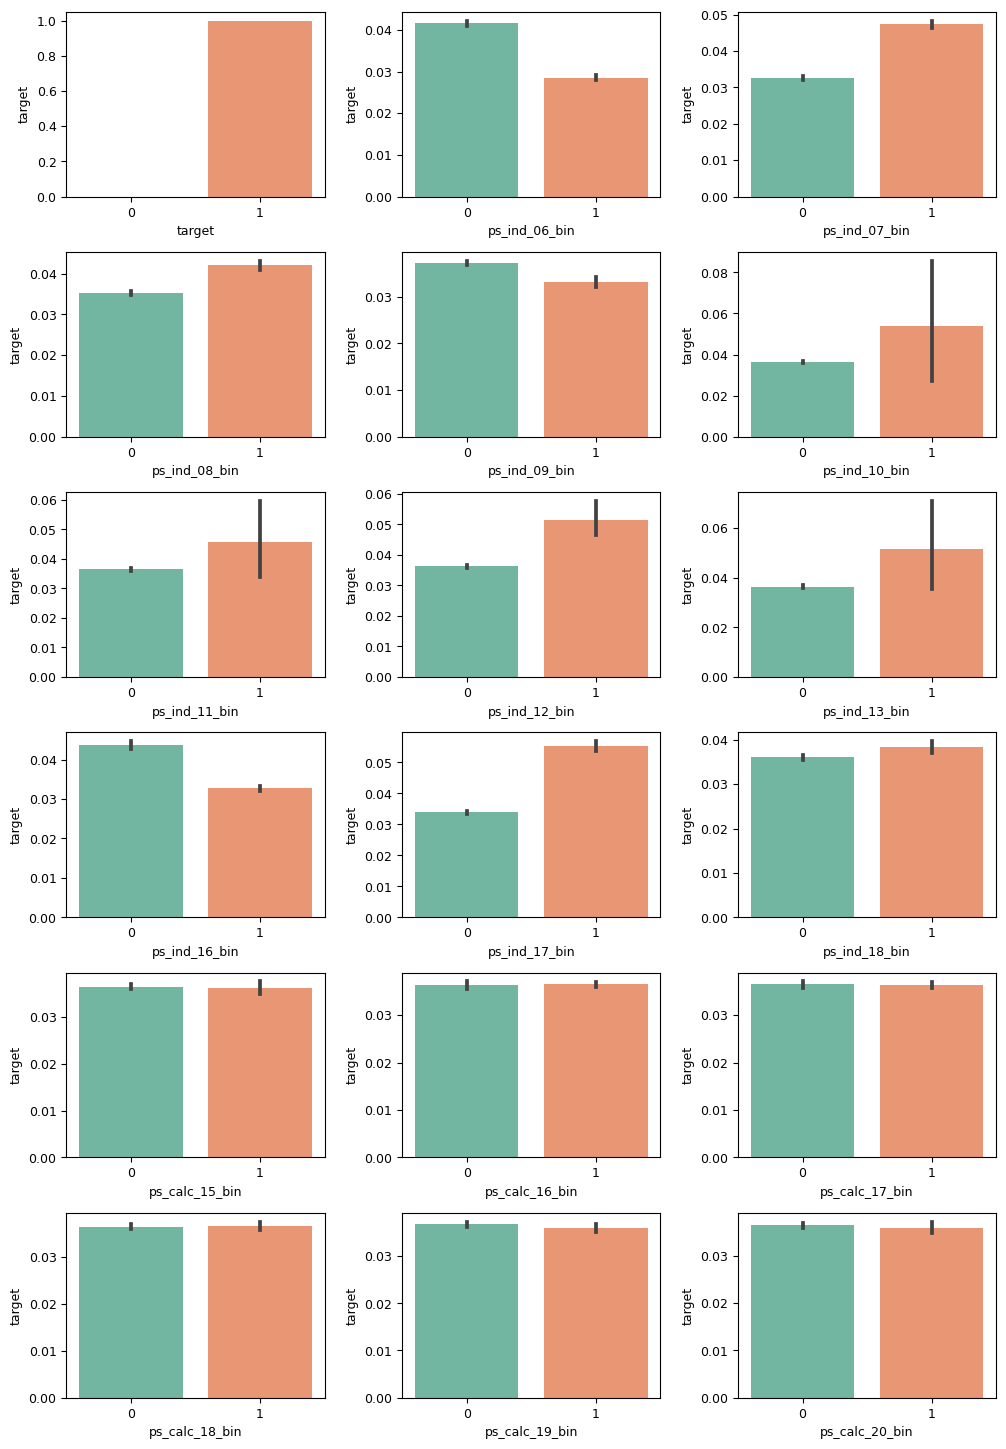

In [27]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     
    # Create grids for given number of subplots
    grid = gridspec.GridSpec(num_rows, num_cols) 
    # spacing between each subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for idx, feature in enumerate(features):
        # Create subplot for each grid
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
        
# from feature summary df we made, get binary features only
bin_features = feature_summary[feature_summary['Feature Type'] == 'binary'].index 
# 18 binary features -> (6, 3) row and column
plot_target_ratio_by_features(train, bin_features, 6, 3)

These plots show the percentage of target 1 for given values of features. 

For example, `ps_ind_06_bin` has around 4.2% of target 1 when its value is 0. When its value is 1, target 1 is around 2.8%. Thus we see the differences in target 1 ratios on `ps_ind_06_bin`, and its confidence intervals is also quite small. We can then assume this is useful feature to predict target 1. 

Unlike `ps_ind_06_bin`, feature `ps_cal_17_bin` has very simlar ratio of target 1 for its 0 and 1 values. Also feature `ps_ind_13_bin` has high confidence interval. Thus we can assume these two variables may not be useful features for prediction.

**Table of Features Assumption**
Feature Name | Assumption | Reason |
| ----------- | ----------- | ----------- |
|ps_ind_06_bin ~ ps_ind_09_bin | Useful | difference in target ratio and low confidence interval |
|ps_ind_16_bin ~ ps_ind_18_bin | Useful | difference in target ratio and low confidence interval |
|ps_ind_10_bin ~ ps_ind_13_bin | Not useful | high confidence interval |
|ps_calc_15_bin ~ ps_calc_20_bin | Not useful | similar target 1 ratio |

However, this is an assumption. We will find more as we go through the analysis

**Notes 3 : There are some binary features that is assumed to be not useful for the prediction: `ps_ind_10_bin ~ ps_ind_13_bin` and `ps_calc_15_bin ~ ps_calc_20_bin`**

------------------------
Plots for Categorical features

feature_summary[feature_summary['Feature Type'] == 'categorical'].shape

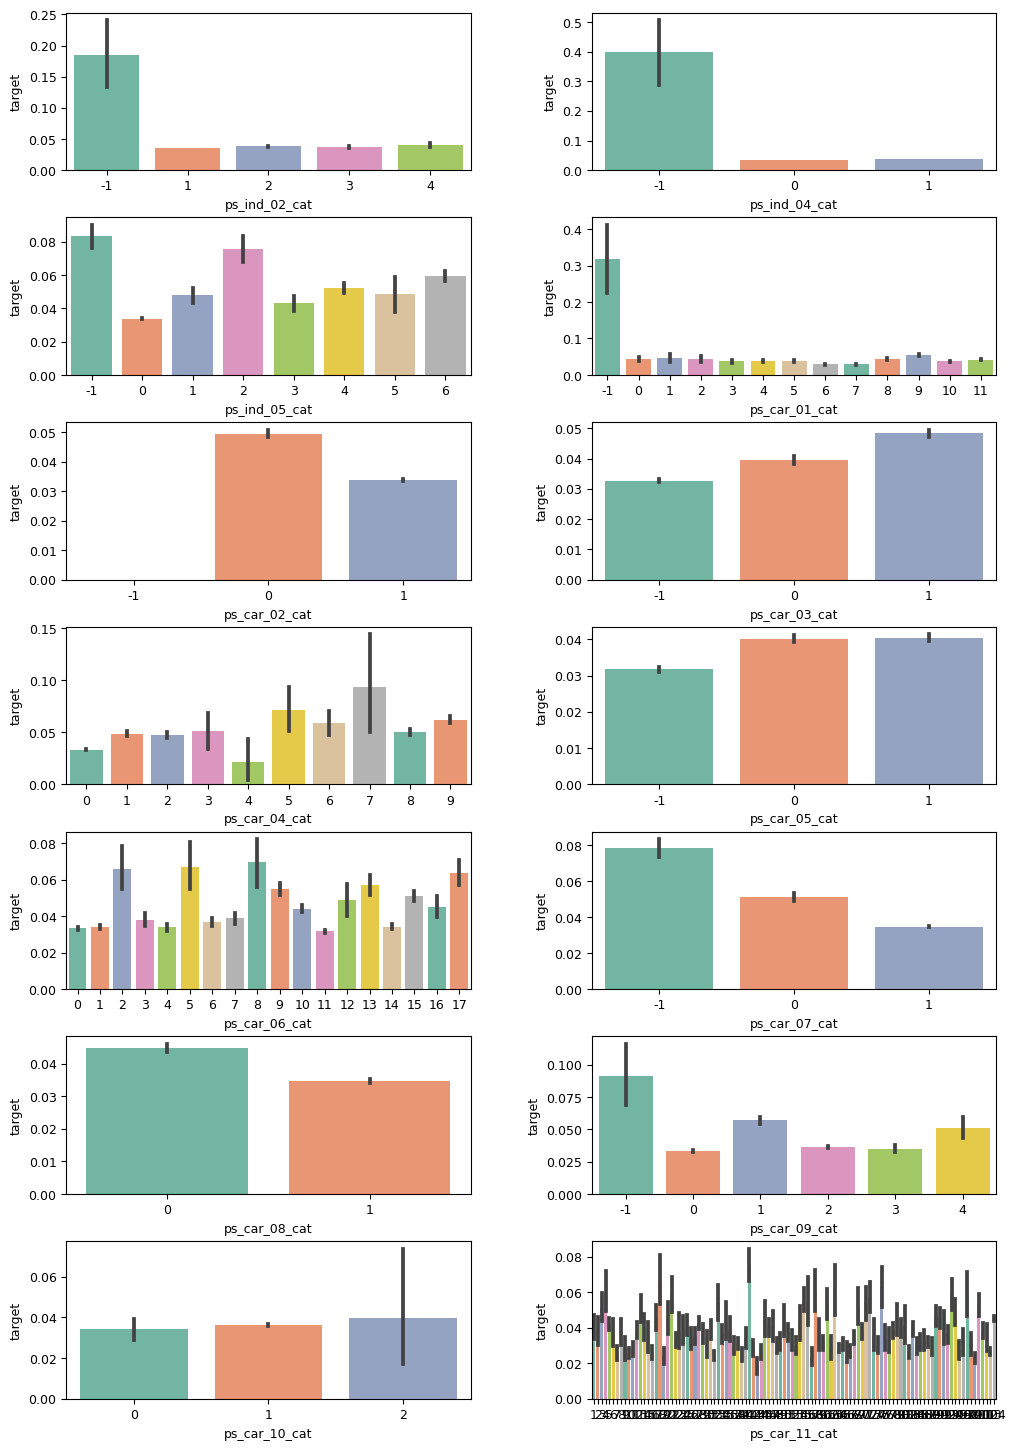

In [28]:
cat_features = feature_summary[feature_summary['Feature Type'] == 'categorical'].index

plot_target_ratio_by_features(train, cat_features, 7, 2)

Interesting finding from the categorical features:
- We notice several features have -1, which is missing values. 
- Features `ps_ind_02_cat`, `ps_ind_04_cat`, and `ps_car_01_cat` have high target 1 ratio for missing values. Although it has some high confidence interval, it indicates missing value has some predictive power toward the target variables. Thus it may be a good idea to keep the missing values
- `ps_car_02_cat` has 0% of target 1 when it is -1 (when it is missing). This tells that when this feature is missing, target is 0. Thus it also has meaning information with missing value. 
- Most of the categorical variables seem significant to predicting target 1
- `ps_car_10_cat` have some high confidence interval when feature is 2. Also this features' target 1 ratio seem similar. It can be removed from our feature list. We need to choose whether to keep it or remove it. We can also try both keeping and removing and compare the the performance.

**Notes 4 : All categorical features are used for modeling.**

**Notes 5 : `ps_car_10_cat` feature can be deleted. After testing performance by including and excluding, we make a final decision of it.**
**Notes 6 : Missing values has meaning information. Keep as it is without imputation**

------------------------
Plots for Ordinal Features

In [29]:
feature_summary[feature_summary['Feature Type'] == 'ordinal'].shape

(16, 4)

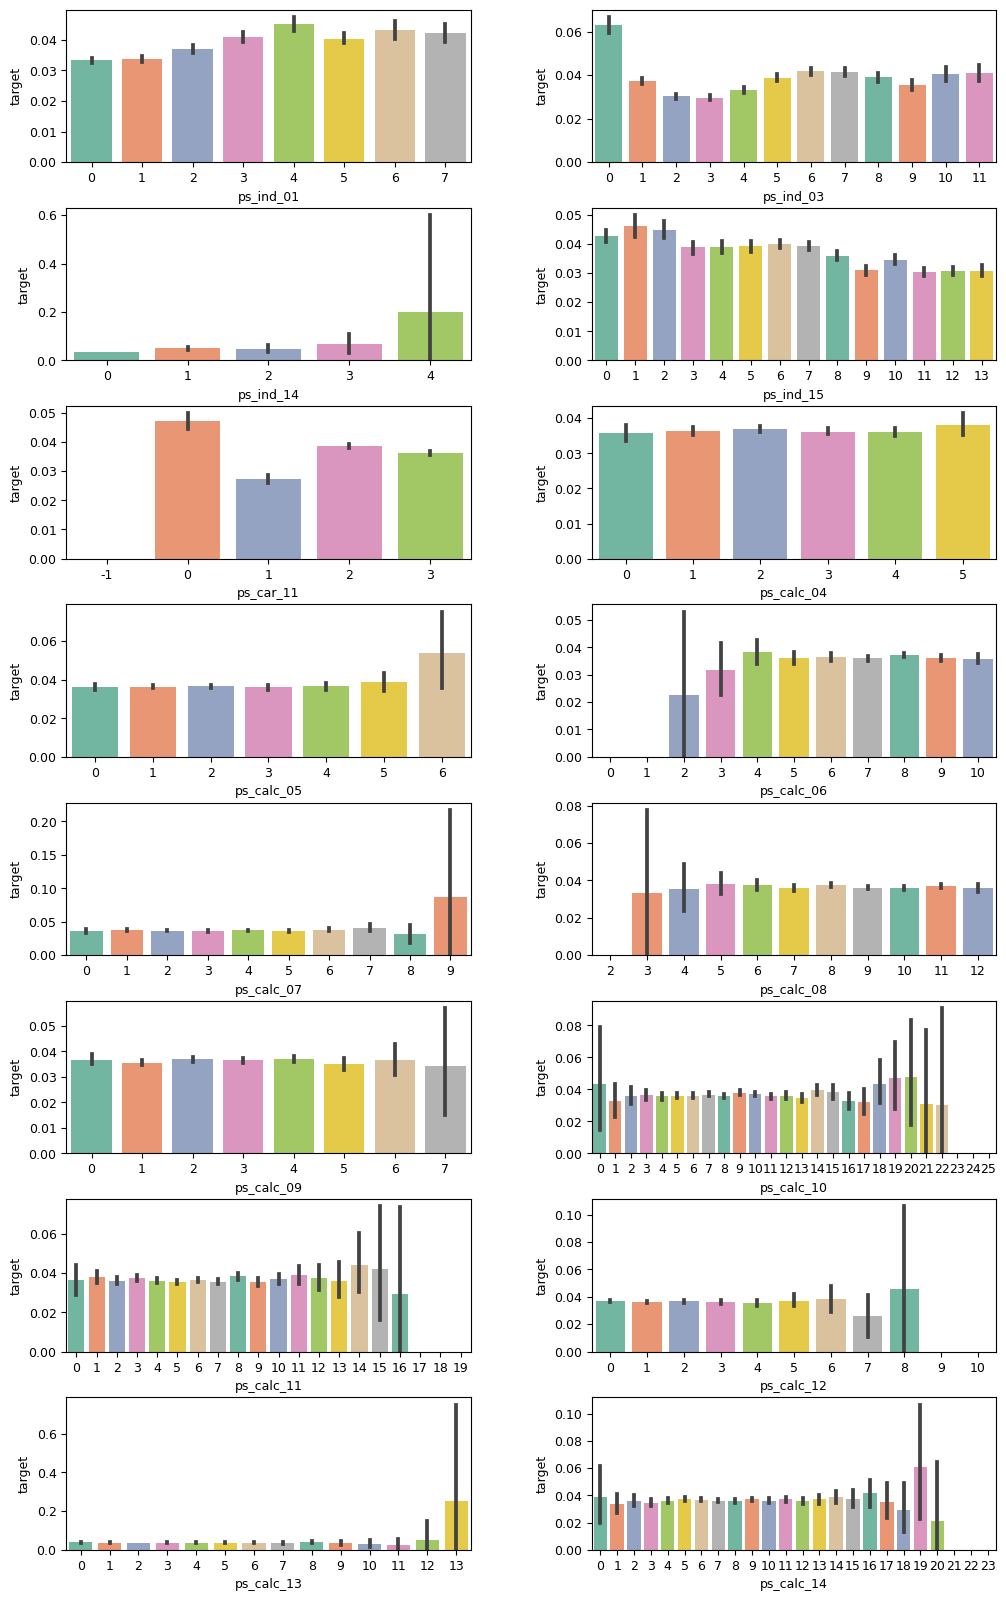

In [30]:
ord_features = feature_summary[feature_summary['Feature Type'] == 'ordinal'].index

plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20)) 

Few analysis found in these plots

- `ps_ind_14` can be assumed as weak feature as its target ratios for each unique values are similar (0 to 3). When its value is 4, it has around 20% of target 1 but its confidence interval is high. So it may be weak feature, and we may consider to remove this feature
- `ps_calc_04` ~ `ps_calc_14` can be also worth to consider to remove. Most of its features have similar target 1 ratio values. Even if they have some different target 1 ratios through out their unique values, those unique values have high confidence intervals. 

**Notes 7 : It may be worth to consider feature `ps_ind_14` and `ps_calc_04` ~ `ps_calc_14` as weak features**

------------------------
Plots for Continuous Features

In [31]:
feature_summary[feature_summary['Feature Type'] == 'continuous'].shape

(10, 4)

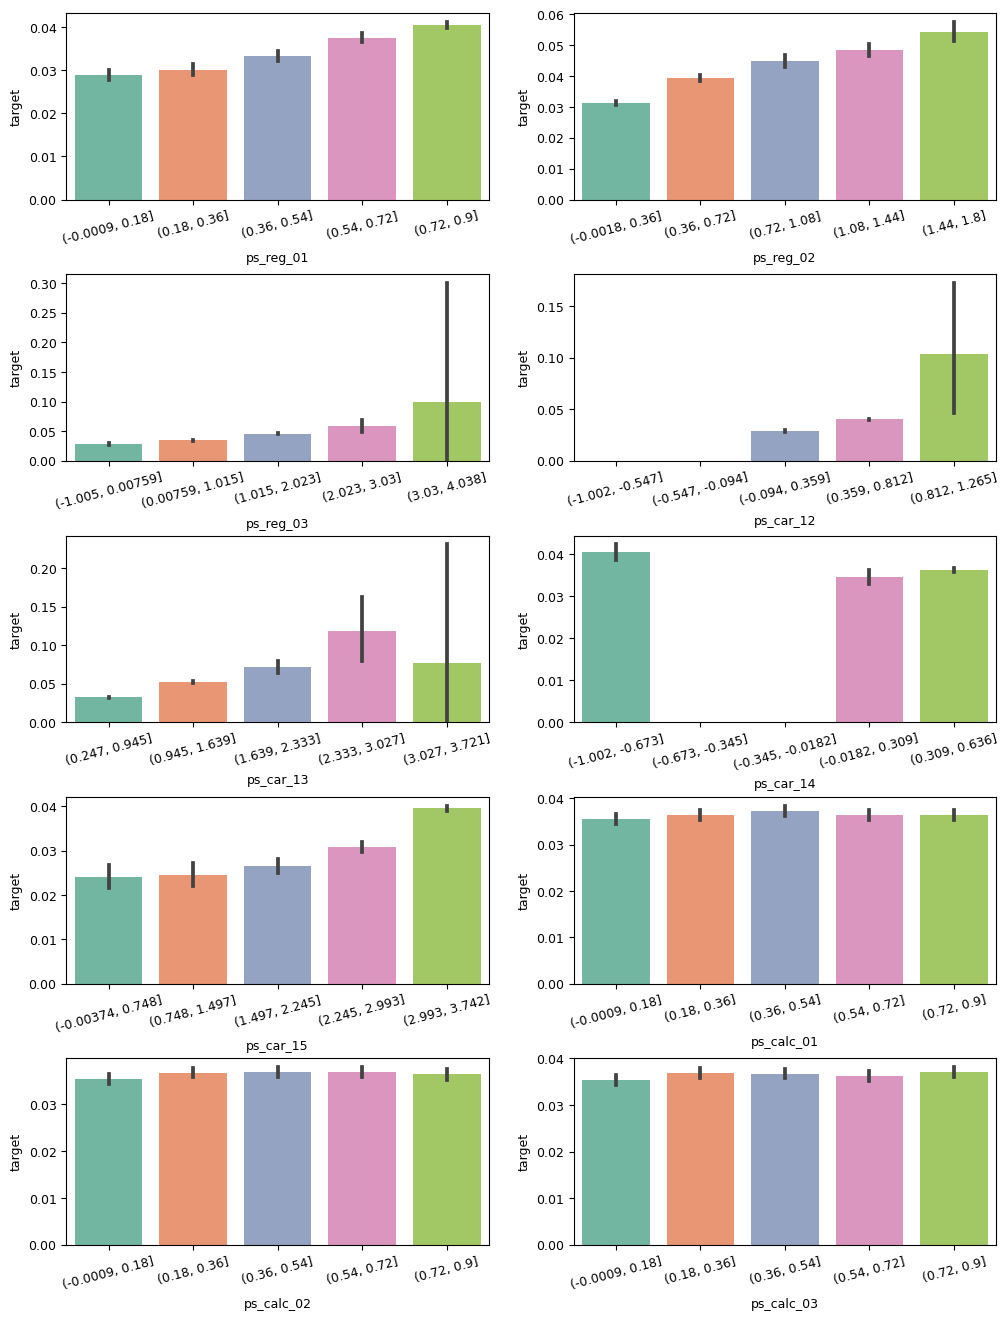

In [32]:
cont_features = feature_summary[feature_summary['Feature Type'] == 'continuous'].index # 연속형 피처

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(5, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=15) # x축 라벨 회전

Most of features looks good to keep but `ps_calc_01`~`ps_calc_03` has very similar target 1 ratio. Thus we can consider to remove those features.

**Notes 8: It is worth consider to remove `ps_calc_01`~`ps_calc_03` as they show weak statistical significance**

------------------------
### Correlation
For numerical variables, it is also important to look at correlations between features. If there is high correlation between two features, it will have similar predictive power and it will impact the model performance. We will create heatmap to see visually. First we will create copy of train and drop NaN values as those NaN values will impact calculating correct correlation

In [34]:
train_copy = train_copy.dropna()

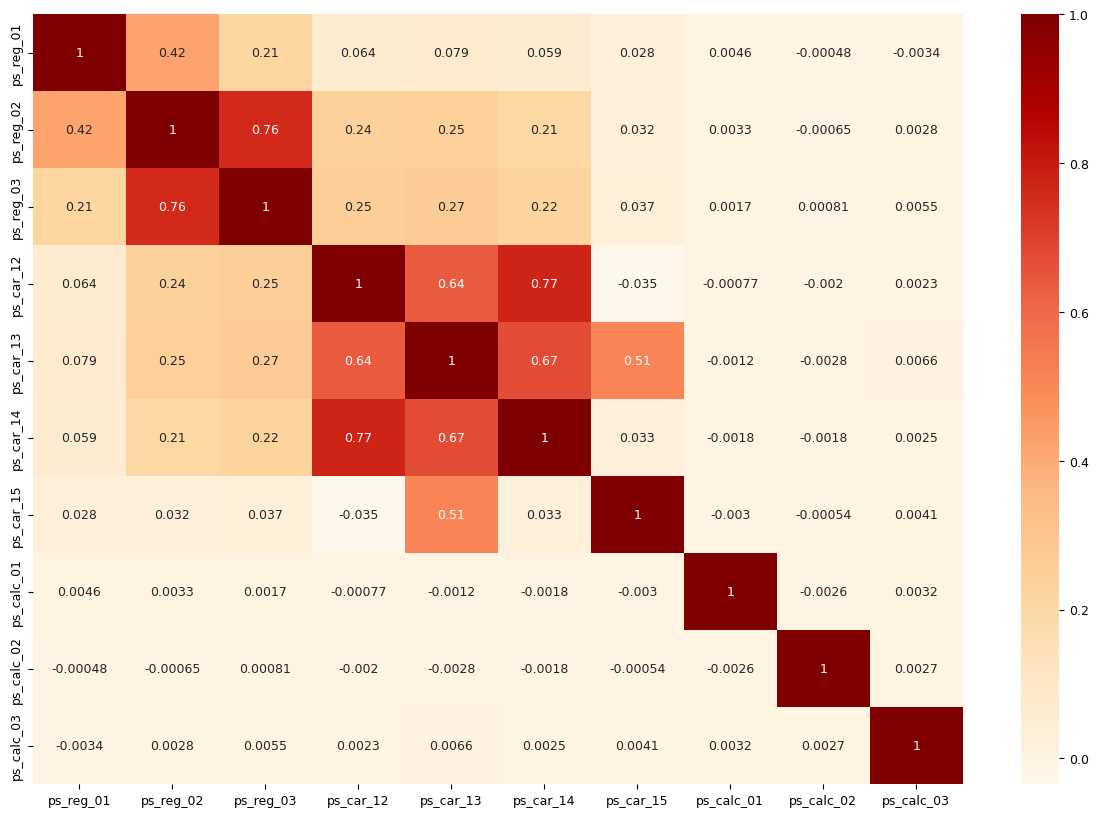

In [36]:
plt.figure(figsize=(15,10))

cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd');

From the correlation heatmap we found `ps_car_12` and `ps_car_14` has 0.77 with highest correlation. Then `ps_reg_02` and `ps_reg_03` has second highest correlation with 0.76. We can remove both features in baseline then decide to keep it or not by comparing the performances.

**Notes 8 : `ps_car_12` and `ps_car_14` has 0.77 with highest correlation. Then `ps_reg_02` and `ps_reg_03` has second highest correlation with 0.76. It may be worth to remove those features. We will remove them in baseline model. Then after including them, we will compare the performance with baseline model to keep it or not on the final model.**

------------------------
------------------------
# Summary of EDA

- From the missingno bar plots, we identified `ps_reg_03`, `ps_car_03_cat`, `ps_car_05_cat`, and `ps_car_14` have quite large number of missing values.
- Target data is inbalance
- There are some binary features that is assumed to be not useful for the prediction: `ps_ind_10_bin ~ ps_ind_13_bin` and `ps_calc_15_bin ~ ps_calc_20_bin`
- All categorical features are used for modeling.
- `ps_car_10_cat` feature can be weak feature but keep for baseline model. After testing performance by including and excluding, we make a final decision of it.
- Missing values has meaning information. Keep as it is without imputation
- It may be worth to consider feature `ps_ind_14` and `ps_calc_04` ~ `ps_calc_14` as weak features
- It is worth consider to remove `ps_calc_01`~`ps_calc_03` as they show weak statistical significance
- `ps_car_12` and `ps_car_14` has 0.77 with highest correlation. Then `ps_reg_02` and `ps_reg_03` has second highest correlation with 0.76. It may be worth to remove those features.
- Between `ps_car_12` and `ps_car_14`, ps_car_12 seems better
- Between `ps_reg_02` and `ps_reg_03`, ps_reg_02 seems better
- After constructing the baseline model based on this eda, we should compare the baseline models with inclusion of removed features. Then after comparing the performance, we should decide whether to keep or remove them for the final model.
- All `ps_calc_` features is worth consider as weak features